In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ks520\AppData\Local\Temp\ipykernel_12752\1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
calls=pd.read_csv('911.csv')

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
#To get Top 5 zip code from where we get 911 calls
calls['zip'].value_counts().sort_values(ascending=False).head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [6]:
#To get Top 5 townships from where we get 911 calls
calls['twp'].value_counts().sort_values(ascending=False).head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [8]:
#To get the unique values from title column means unique problems 
len(calls['title'].unique())

110

In [9]:
#I made a new column in which only problems will be there
calls['reasons']=calls['title'].apply(lambda x: x.split(':')[0])

In [10]:
#Found most common for calls
calls['reasons'].value_counts()

reasons
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

C:\Users\ks520\AppData\Local\Temp\ipykernel_12752\4292936427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reasons',data=calls,palette='viridis')


<Axes: xlabel='reasons', ylabel='count'>

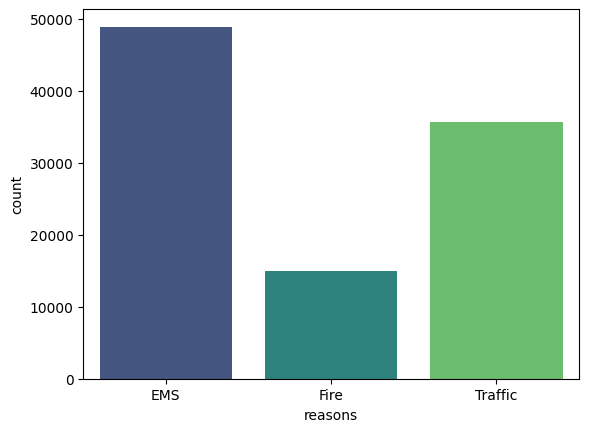

In [11]:
#Plotted a countplot of 911 calls by reasons
sns.countplot(x='reasons',data=calls,palette='viridis')

In [12]:
#Converted data type into datetime for using it easily
calls['timeStamp']=pd.to_datetime(calls['timeStamp'])

In [13]:
#Made three diff columns of Hour,Month and Day of Week
calls['Hour']=calls['timeStamp'].apply(lambda x:x.hour)
calls['Month']=calls['timeStamp'].apply(lambda x:x.month)
calls['Day of Week']=calls['timeStamp'].apply(lambda x:x.day_of_week)

In [14]:
#Now assigned the value according to day of week 0 for Mon and something like this
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
calls['Day of Week']=calls['Day of Week'].map(dmap)

<Axes: xlabel='Day of Week', ylabel='count'>

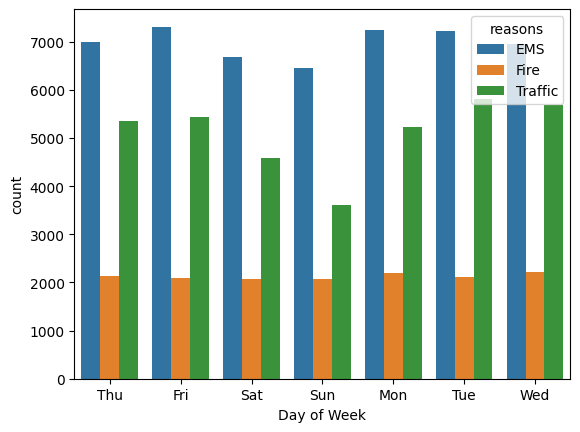

In [15]:
#Now plotted a countplot of 911 calls according to day of week and reasons
sns.countplot(x='Day of Week',data=calls,hue='reasons')

<Axes: xlabel='Month', ylabel='count'>

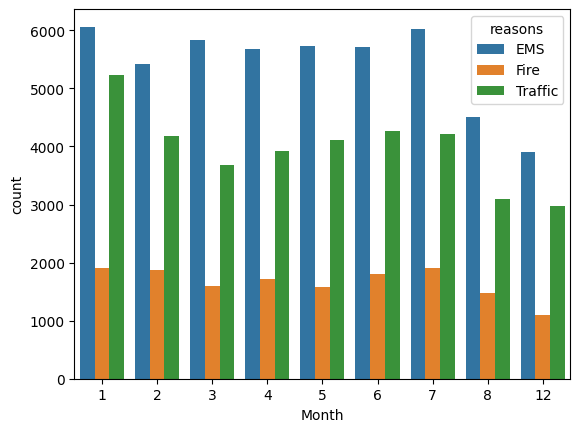

In [17]:
#Now plotted a countplot of 911 calls according to months and reasons
sns.countplot(x='Month',data=calls,hue='reasons')

Here get to know that data is missing of some months 